# Yelp Image Recognition Classifier
# Omar ALShaye

# Chiraag (Monu) Kala

# Dan McDonough

# ----

##  Import Packages 

In [1]:
# Import packages and set numpy random seed
import numpy as np
np.random.seed(5) 
import tensorflow as tf
tf.set_random_seed(2)
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

## Import pickled images

The images have been preprocessed (normalized RGB values and resized to 256x256). They are all stored in this pickled numpy array, which we will load.

In [2]:
pickle_directory = "C://Users/omar/Desktop/Deep Learning Project/Project 2/re-pickled/"
food_images = np.load(pickle_directory + 'food_pickled2.npy')
drink_images = np.load(pickle_directory + 'drink_pickled2.npy')

## Append images

In [3]:
images = np.append(food_images, drink_images, axis = 0)

## Create and append labels

In [4]:
food = np.repeat('food', 11000)
drink = np.repeat('drink', 11000)

In [5]:
labels = np.append(food, drink, axis = 0)

In [6]:
uniq_labels = np.unique(labels)

## Train and test split

In [7]:
import keras

Using TensorFlow backend.


In [8]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, 
                                                    random_state=42, 
                                                    stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of Yelp Factors: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

#eval_n = len(X_eval)
#print("Number of evaluation images: ", eval_n)

Total number of Yelp Factors:  2
Number of training images:  19800
Number of testing images:  2200


In [9]:
np.unique(y_train, return_counts = True)

(array(['drink', 'food'], dtype='<U5'), array([9900, 9900], dtype=int64))

## Visualize the training data
<p>Now we'll begin by creating a list of string-valued labels containing the letters that appear in the dataset.  Then, we visualize the first several images in the training data, along with their corresponding labels.</p>

In [10]:
#Helper function to print images
def print_images(image_list):
    n = int(len(image_list) / len(uniq_labels))
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[int(n*i)])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

Training Images: 


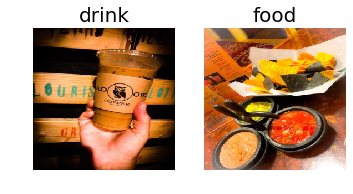

In [11]:
y_train_in = y_train.argsort()
y_train = y_train[y_train_in]
X_train = X_train[y_train_in]

print("Training Images: ")
print_images(image_list = X_train)

Testing images: 


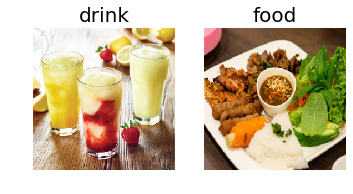

In [12]:
y_test_in = y_test.argsort()
y_test = y_test[y_test_in]
X_test = X_test[y_test_in]

print("Testing images: ")
print_images(image_list = X_test)

## One-hot encode the data
<p>Currently, our labels for each of the letters are encoded as categorical integers, where <code>'A'</code>, <code>'B'</code> and <code>'C'</code> are encoded as <code>0</code>, <code>1</code>, and <code>2</code>, respectively.  However, recall that Keras models do not accept labels in this format, and we must first one-hot encode the labels before supplying them to a Keras model.</p>
<p>This conversion will turn the one-dimensional array of labels into a two-dimensional array.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_509/img/onehot.png" alt="one-hot encoding"></p>
<p>Each row in the two-dimensional array of one-hot encoded labels corresponds to a different image.  The row has a <code>1</code> in the column that corresponds to the correct label, and <code>0</code> elsewhere.  </p>
<p>For instance, </p>
<ul>
<li><code>0</code> is encoded as <code>[1, 0, 0]</code>, </li>
<li><code>1</code> is encoded as <code>[0, 1, 0]</code>, and </li>
<li><code>2</code> is encoded as <code>[0, 0, 1]</code>.</li>
</ul>

In [10]:
import pandas as pd
y_train = pd.factorize(y_train)

In [11]:
y_train = y_train[0]
y_train

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [12]:
y_test = pd.factorize(y_test)

In [13]:
y_test = y_test[0]
y_test

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [14]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [15]:
print(y_train[0])
print(len(y_train[0]))

[1. 0.]
2


##### Clearing Variables for Memory

In [16]:
del food 
del drink 

In [17]:
del food_images
del drink_images 
del images

In [20]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Model 1 - Baseline Model 

## Define the model
<p>Now it's time to define a convolutional neural network to classify the data.</p>
<p>This network accepts an image of an American Sign Language letter as input.  The output layer returns the network's predicted probabilities that the image belongs in each category.</p>

In [21]:
#from numpy.random import seed
#np.random.seed(5) 
#from tensorflow import set_random_seed
#set_random_seed(2)

In [22]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu', 
                 input_shape = (256, 256, 3)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 64)      4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)    

## Compile the model
<p>After we have defined a neural network in Keras, the next step is to compile it! </p>

In [27]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy']

## Train the model

In [ ]:
#hist1 = model.fit(X_train, y_train, epochs = 5, batch_size = 64)

from keras.callbacks import EarlyStopping  
early_stopping = EarlyStopping(monitor="val_loss", patience=10)
hist1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64,
          callbacks=[early_stopping], verbose=1)

In [43]:
#Load the orginal baseline model

from keras.models import load_model
model = load_model('Yelp_1_baseline.h5')

In [29]:
model

### save model

In [5]:
# Save the model
#model.save('Yelp_1_baseline.h5')

## Visualize training: plot the val_loss/accuracy with each epoch

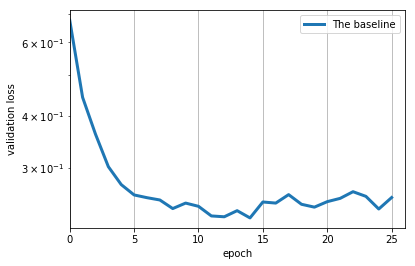

In [46]:
valid_loss1 = hist1.history["loss"]
plt.plot(valid_loss1, linewidth=3, label="The baseline")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("validation loss")
plt.xlim(0, 26)
#plt.ylim(0.48, 0.6)
plt.yscale("log")
plt.show()

## Test the model
<p>To evaluate the model, we'll use the test dataset.  This will tell us how the network performs when classifying images it has never seen before!</p>
<p>If the classification accuracy on the test dataset is similar to the training dataset, this is a good sign that the model did not overfit to the training data.  </p>

In [47]:
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

Accuracy for test images: 91.682 %


## Visualize the results

In [48]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
plt.show()

In [49]:
X_test = X_test.astype(float)

In [50]:
#y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
#del X_train
y_test_pred = model.predict(X_test)

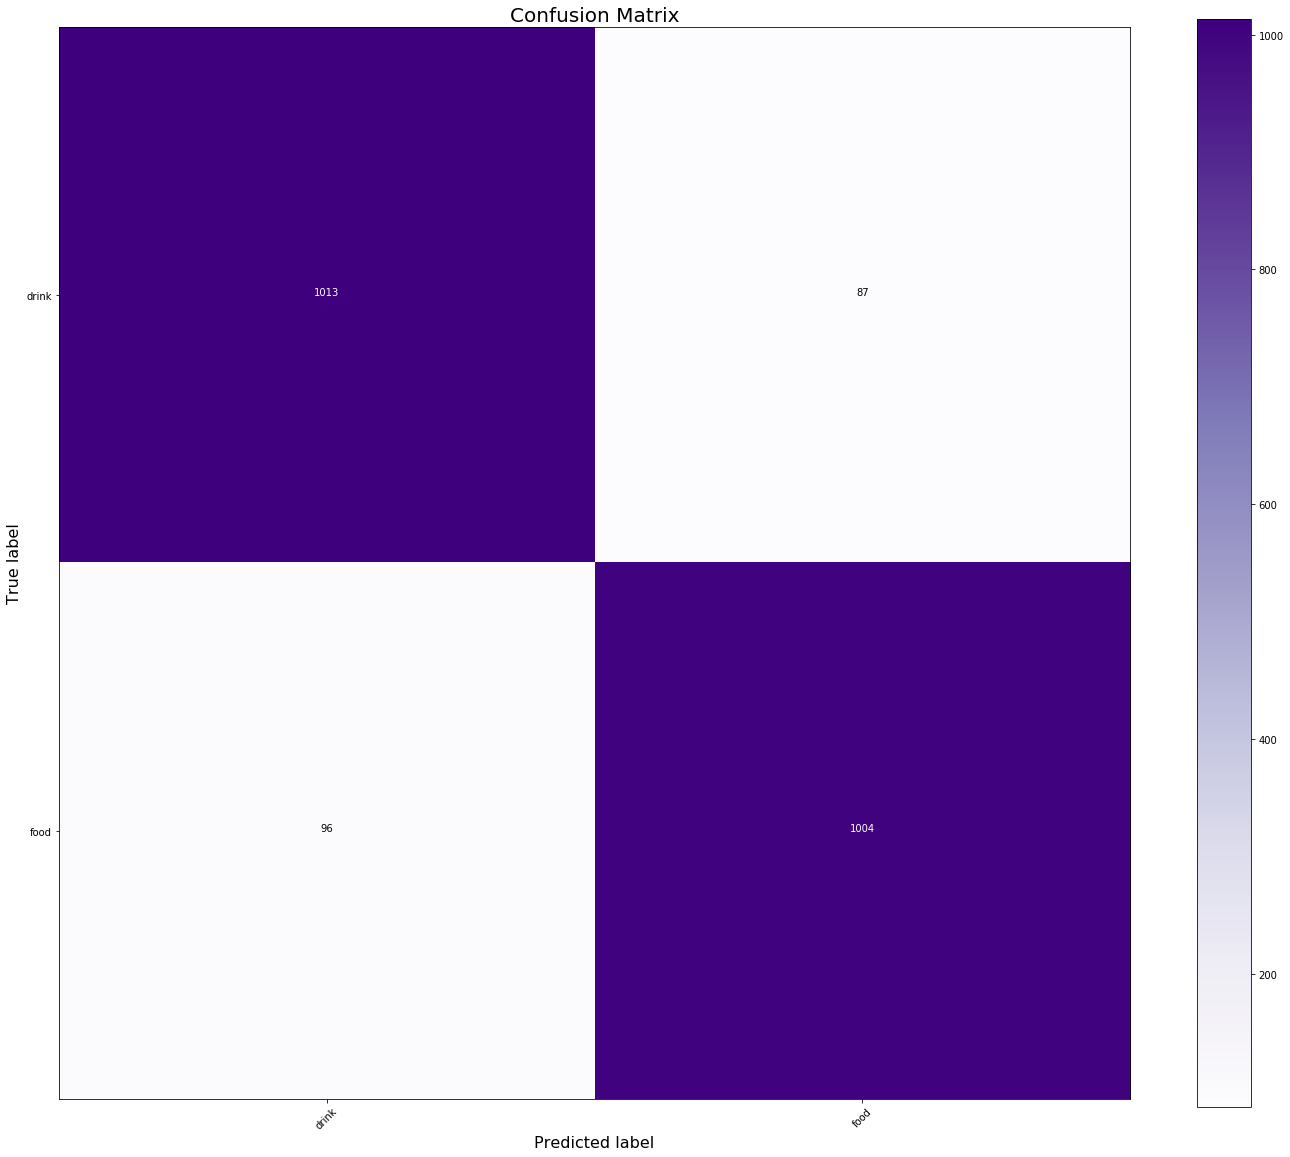

In [51]:
from sklearn.metrics import confusion_matrix
import itertools

plot_confusion_matrix(y_test, y_test_pred)

# Hyperparameter Tuning for Base Model


## Step 1. Change Learning Rate 1: lr 0.01

In [52]:
rm = keras.optimizers.RMSprop(lr=0.01)
model.compile(optimizer = rm, loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Train the model

In [53]:
#hist1 = model.fit(X_train, y_train, epochs = 5, batch_size = 64)

from keras.callbacks import EarlyStopping  
early_stopping = EarlyStopping(monitor="val_loss", patience=10)
hist1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64,
          callbacks=[early_stopping], verbose=1)

Train on 19800 samples, validate on 2200 samples
Epoch 1/200
19800/19800 [==============================] - 105s 5ms/step - loss: 8.0337 - acc: 0.5014 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/200
19800/19800 [==============================] - 105s 5ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/200
19800/19800 [==============================] - 105s 5ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/200
19800/19800 [==============================] - 105s 5ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/200
19800/19800 [==============================] - 106s 5ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/200
19800/19800 [==============================] - 106s 5ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/200
14144/19800 [====================>.........] - ETA: 28s - loss: 7.9850 - acc: 0.5046

KeyboardInterrupt: 

### Result - The model did not learn with a learning rate of 0.01 (too high). 


## Step 2. Change Learning Rate 1: lr 0.0001

## Compile the model

In [23]:
rm = keras.optimizers.RMSprop(lr=0.0001)
model.compile(optimizer = rm, loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Train the model

In [24]:
#hist1 = model.fit(X_train, y_train, epochs = 5, batch_size = 64)

from keras.callbacks import EarlyStopping  
early_stopping = EarlyStopping(monitor="val_loss", patience=10)
hist1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64,
          callbacks=[early_stopping], verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 19800 samples, validate on 2200 samples
Epoch 1/200
19800/19800 [==============================] - 138s 7ms/step - loss: 0.5920 - acc: 0.6753 - val_loss: 1.2097 - val_acc: 0.1836
Epoch 2/200
19800/19800 [==============================] - 105s 5ms/step - loss: 0.4053 - acc: 0.8210 - val_loss: 1.9805 - val_acc: 0.1609
Epoch 3/200
19800/19800 [==============================] - 105s 5ms/step - loss: 0.3237 - acc: 0.8640 - val_loss: 2.6822 - val_acc: 0.1782
Epoch 4/200
19800/19800 [==============================] - 105s 5ms/step - loss: 0.2722 - acc: 0.8895 - val_loss: 3.4823 - val_acc: 0.1095
Epoch 5/200
19800/19800 [==============================] - 105s 5ms/step - loss: 0.2420 - acc: 0.9036 - val_loss: 3.4999 - val_acc: 0.1068
Epoch 6/200
19800/19800 [==============================] - 107s 5ms/step - loss: 0.2171 - acc: 0.9152 - val_loss: 3.4988 - val_acc: 0.1300
Epoch 7/200
19800/19800 [==============================] - 106s 5ms/s

KeyboardInterrupt: 

### Result - The model was overfitting with a learning rate of 0.0001 (too low). 

## Save the model

In [ ]:
# Save the model
model.save('Yelp_Lr-0.0001.h5')

# -------------------------------------------------------------------------------------------



# Model 2 - New Architecture 

## Define the Model

In [ ]:
np.random.seed(5) 
import tensorflow as tf
tf.set_random_seed(2)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential

model2 = Sequential()
model2.add(Conv2D(filters = 64, kernel_size = 4, padding = 'same', activation =
'relu',input_shape = (256, 256, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(filters = 128, kernel_size = 4, padding = 'same', activation =
'relu'))
model2.add(MaxPooling2D(pool_size = (4, 4)))
model2.add(Dropout(0.5))
model2.add(Conv2D(filters = 256 , kernel_size = 4, padding = 'same', activation
= 'relu'))
model2.add(Conv2D(filters = 128 , kernel_size = 4, padding = 'same', activation
= 'relu'))
model2.add(MaxPooling2D(pool_size = (4, 4)))
model2.add(Dropout(0.4))
model2.add(Conv2D(filters = 256 , kernel_size = 4, padding = 'same', activation
= 'relu'))
model2.add(Dropout(0.2))
model2.add(Conv2D(filters = 64 , kernel_size = 4, padding = 'same', activation
= 'relu'))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(2, activation='softmax'))
model2.summary()

## Compile the model

In [ ]:
#model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# For a binary classification problem
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train the model with early stopping

In [ ]:
from keras.callbacks import EarlyStopping  
early_stopping = EarlyStopping(monitor="val_loss", patience=5)
hist2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200,
          callbacks=[early_stopping], verbose=1)

## Save the model

In [ ]:
# Save the model
model2.save('Yelp_two_model.h5')

## Visualize the training loss with each epoch

In [ ]:
valid_loss1 = net1.history["val_loss"]
plt.plot(valid_loss1, linewidth=3, label="The baseline")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("validation loss")
plt.xlim(0, 40)
plt.ylim(0.48, 0.6)
plt.yscale("log")
plt.show()

## Test the model

In [ ]:
score = model2.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

## Visualize the results

In [ ]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
plt.show()

In [ ]:
X_test = X_test.astype(float)

In [ ]:
#y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
#del X_train
y_test_pred = model2.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

plot_confusion_matrix(y_test, y_test_pred)

# -------------------------------------------------------------------------------------------

# Model 3 - Applying Resnet 

## Define the model

In [ ]:
from keras import layers
from keras import models

# image dimensions

img_height = 256
img_width = 256
img_channels = 3

#
# network params
#

cardinality = 32


def residual_network(x):
    """
    ResNeXt by default. For ResNet set `cardinality` = 1 above.
    
    """
    def add_common_layers(y):
        y = layers.BatchNormalization()(y)
        y = layers.LeakyReLU()(y)

        return y

    def grouped_convolution(y, nb_channels, _strides):
        # when `cardinality` == 1 this is just a standard convolution
        if cardinality == 1:
            return layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

    def residual_block(y, nb_channels_in, nb_channels_out, _strides=(1, 1), _project_shortcut=False):
        """
        Our network consists of a stack of residual blocks. These blocks have the same topology,
        and are subject to two simple rules:
        - If producing spatial maps of the same size, the blocks share the same hyper-parameters (width and filter sizes).
        - Each time the spatial map is down-sampled by a factor of 2, the width of the blocks is multiplied by a factor of 2.
        """
        shortcut = y

        # we modify the residual building block as a bottleneck design to make the network more economical
        y = layers.Conv2D(nb_channels_in, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        y = add_common_layers(y)

        # ResNeXt (identical to ResNet when `cardinality` == 1)
        y = grouped_convolution(y, nb_channels_in, _strides=_strides)
        y = add_common_layers(y)

        y = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        # batch normalization is employed after aggregating the transformations and before adding to the shortcut
        y = layers.BatchNormalization()(y)

        # identity shortcuts used directly when the input and output are of the same dimensions
        if _project_shortcut or _strides != (1, 1):
            # when the dimensions increase projection shortcut is used to match dimensions (done by 1×1 convolutions)
            # when the shortcuts go across feature maps of two sizes, they are performed with a stride of 2
            shortcut = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=_strides, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)

        y = layers.add([shortcut, y])

        # relu is performed right after each batch normalization,
        # expect for the output of the block where relu is performed after the adding to the shortcut
        y = layers.LeakyReLU()(y)

        return y

    # conv1
    x = layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(x)
    x = add_common_layers(x)

    # conv2
    x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    for i in range(3):
        project_shortcut = True if i == 0 else False
        x = residual_block(x, 128, 256, _project_shortcut=project_shortcut)

    # conv3
    for i in range(4):
        # down-sampling is performed by conv3_1, conv4_1, and conv5_1 with a stride of 2
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 256, 512, _strides=strides)

    # conv4
    for i in range(6):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 512, 1024, _strides=strides)

    # conv5
    for i in range(3):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 1024, 2048, _strides=strides)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(2)(x)

    return x


image_tensor = layers.Input(shape=(img_height, img_width, img_channels))
network_output = residual_network(image_tensor)
  
model = models.Model(inputs=[image_tensor], outputs=[network_output])
print(model.summary())

## Compile the model

In [ ]:
# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train the model

In [ ]:
hist3 = model.fit(X_train, y_train, epochs = 5, batch_size = 64)
#model.fit(X_train, y_train, epochs = 5, batch_size = 64)

## Visualize 
<p>The final step is to take a look at the images that were incorrectly classified by the model.  Do any of the mislabeled images look relatively difficult to classify, even to the human eye?  </p>
<p>Sometimes, it's possible to review the images to discover special characteristics that are confusing to the model.  However, it is also often the case that it's hard to interpret what the model had in mind!</p>

In [ ]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
plt.show()

In [ ]:
X_test = X_test.astype(float)

In [ ]:
#y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
#del X_train
y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

plot_confusion_matrix(y_test, y_test_pred)